In [1]:
# install ultralytic
!pip3 install git+https://github.com/ultralytics/ultralytics.git
!pip3 install kaggle opendatasets


Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/ultralytics/ultralytics.git to c:\users\ganga\appdata\local\temp\pip-req-build-6h3c7132
  Resolved https://github.com/ultralytics/ultralytics.git to commit 2f3e17d23ed92b06ffb34467f88317c8ca584cdb
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for ultralytics: filename=ultralytics-8.2.2-py3-none-any.whl size=754916 sha256=70fe15b82afe7edc531577f86d850c13d4ed54759586cf9dd16d5303b568f6e1
  Stored in directory: C:\Users\ganga\AppData\Local\Temp\pip-ephem-wheel-cache-yyq0btcb\wheels\07\0b\e8\a9b200841fd9259dec61e092d35594d5de8f3412e26e53cb4d
Successfully built ultralytics
  Attempting uninst

  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git 'C:\Users\ganga\AppData\Local\Temp\pip-req-build-6h3c7132'


Defaulting to user installation because normal site-packages is not writeable


In [2]:
!ls /content/yoga-pose-classification/YogaPoses

'ls' is not recognized as an internal or external command,
operable program or batch file.


## Yolov8 Pose

In [3]:
import cv2
from PIL import Image
from pydantic import BaseModel

import ultralytics

In [4]:
model = ultralytics.YOLO(model='yolov8m-pose.pt')

In [9]:
image = cv2.imread(r'C:\Users\ganga\Downloads\YOLO v-8 code\yolo v-8 HPE\datasets\YogaPoses\Plank\00000001.jpg')
result = model.predict(image, save=False)[0]
result_keypoint = result.keypoints.xyn.cpu().numpy()[0]
result.boxes.xyxy


0: 384x640 1 person, 562.4ms
Speed: 10.0ms preprocess, 562.4ms inference, 3458.7ms postprocess per image at shape (1, 3, 384, 640)


tensor([[ 45.,  12., 312., 170.]])

In [10]:
result.keypoints[0]

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9027, 0.9388, 0.2670, 0.9811, 0.0606, 0.9994, 0.9810, 0.9978, 0.7440, 0.9698, 0.4935, 0.9991, 0.9956, 0.9926, 0.9692, 0.9062, 0.8443]])
data: tensor([[[5.2108e+01, 5.0837e+01, 9.0265e-01],
         [5.4332e+01, 4.4968e+01, 9.3875e-01],
         [0.0000e+00, 0.0000e+00, 2.6704e-01],
         [7.1432e+01, 3.8883e+01, 9.8111e-01],
         [0.0000e+00, 0.0000e+00, 6.0556e-02],
         [9.4650e+01, 5.6272e+01, 9.9935e-01],
         [8.6145e+01, 5.6813e+01, 9.8097e-01],
         [1.0172e+02, 1.1044e+02, 9.9784e-01],
         [8.4572e+01, 9.7671e+01, 7.4405e-01],
         [8.7510e+01, 1.5172e+02, 9.6976e-01],
         [0.0000e+00, 0.0000e+00, 4.9354e-01],
         [1.7241e+02, 7.1537e+01, 9.9908e-01],
         [1.6536e+02, 7.8688e+01, 9.9557e-01],
         [2.2054e+02, 1.0581e+02, 9.9258e-01],
         [2.1889e+02, 1.0616e+02, 9.6917e-01],
         [2.9269e+02, 1.1777e+02, 9.0623e-01],
         [2.9054e+02, 1.129

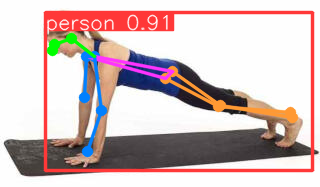

In [11]:
Image.fromarray(cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB))

## Generate Dataset

### Keypoint extract

Yolov8 pose estimation memiliki 17 keypoint 
* NOSE:           int = 0
* LEFT_EYE:       int = 1
* RIGHT_EYE:      int = 2
* LEFT_EAR:       int = 3
* RIGHT_EAR:      int = 4
* LEFT_SHOULDER:  int = 5
* RIGHT_SHOULDER: int = 6
* LEFT_ELBOW:     int = 7
* RIGHT_ELBOW:    int = 8
* LEFT_WRIST:     int = 9
* RIGHT_WRIST:    int = 10
* LEFT_HIP:       int = 11
* RIGHT_HIP:      int = 12
* LEFT_KNEE:      int = 13
* RIGHT_KNEE:     int = 14
* LEFT_ANKLE:     int = 15
* RIGHT_ANKLE:    int = 16

In [12]:
class GetKeypoint(BaseModel):
    NOSE:           int = 0
    LEFT_EYE:       int = 1
    RIGHT_EYE:      int = 2
    LEFT_EAR:       int = 3
    RIGHT_EAR:      int = 4
    LEFT_SHOULDER:  int = 5
    RIGHT_SHOULDER: int = 6
    LEFT_ELBOW:     int = 7
    RIGHT_ELBOW:    int = 8
    LEFT_WRIST:     int = 9
    RIGHT_WRIST:    int = 10
    LEFT_HIP:       int = 11
    RIGHT_HIP:      int = 12
    LEFT_KNEE:      int = 13
    RIGHT_KNEE:     int = 14
    LEFT_ANKLE:     int = 15
    RIGHT_ANKLE:    int = 16

get_keypoint = GetKeypoint()

In [13]:
import os
import glob

In [14]:
dataset_root = r'C:\Users\ganga\Downloads\YOLO v-8 code\yolo v-8 HPE\datasets\YogaPoses'
pose_list = os.listdir(dataset_root)
pose_list

['Downdog', 'Goddess', 'Plank', 'Tree', 'Warrior2']

In [16]:
def extract_keypoint(keypoint):
    # nose
    nose_x, nose_y = keypoint[get_keypoint.NOSE]
    # eye
    left_eye_x, left_eye_y = keypoint[get_keypoint.LEFT_EYE]
    right_eye_x, right_eye_y = keypoint[get_keypoint.RIGHT_EYE]
    # ear
    left_ear_x, left_ear_y = keypoint[get_keypoint.LEFT_EAR]
    right_ear_x, right_ear_y = keypoint[get_keypoint.RIGHT_EAR]
    # shoulder
    left_shoulder_x, left_shoulder_y = keypoint[get_keypoint.LEFT_SHOULDER]
    right_shoulder_x, right_shoulder_y = keypoint[get_keypoint.RIGHT_SHOULDER]
    # elbow
    left_elbow_x, left_elbow_y = keypoint[get_keypoint.LEFT_ELBOW]
    right_elbow_x, right_elbow_y = keypoint[get_keypoint.RIGHT_ELBOW]
    # wrist
    left_wrist_x, left_wrist_y = keypoint[get_keypoint.LEFT_WRIST]
    right_wrist_x, right_wrist_y = keypoint[get_keypoint.RIGHT_WRIST]
    # hip
    left_hip_x, left_hip_y = keypoint[get_keypoint.LEFT_HIP]
    right_hip_x, right_hip_y = keypoint[get_keypoint.RIGHT_HIP]
    # knee
    left_knee_x, left_knee_y = keypoint[get_keypoint.LEFT_KNEE]
    right_knee_x, right_knee_y = keypoint[get_keypoint.RIGHT_KNEE]
    # ankle
    left_ankle_x, left_ankle_y = keypoint[get_keypoint.LEFT_ANKLE]
    right_ankle_x, right_ankle_y = keypoint[get_keypoint.RIGHT_ANKLE]
    
    return [
        nose_x, nose_y,
        left_eye_x, left_eye_y,
        right_eye_x, right_eye_y,
        left_ear_x, left_ear_y,
        right_ear_x, right_ear_y,
        left_shoulder_x, left_shoulder_y,
        right_shoulder_x, right_shoulder_y,
        left_elbow_x, left_elbow_y,
        right_elbow_x, right_elbow_y,
        left_wrist_x, left_wrist_y,
        right_wrist_x, right_wrist_y,
        left_hip_x, left_hip_y,
        right_hip_x, right_hip_y,
        left_knee_x, left_knee_y,
        right_knee_x, right_knee_y,        
        left_ankle_x, left_ankle_y,
        right_ankle_x, right_ankle_y
    ]

### Run image

In [17]:
dataset_csv = []
for pose in pose_list:
    image_path_list = glob.glob(f'{dataset_root}/{pose}/*.jpg')
    for image_path in image_path_list:
        # get image_name
        image_name = image_path.split('/')[-1]
        # read numpy image
        image = cv2.imread(image_path)
        # get height width image
        height, width = image.shape[:2]
        
        # detect pose using yolov8-pose
        results = model.predict(image, save=False)[0]
        results_keypoint = results.keypoints.xyn.cpu().numpy()
        for result_keypoint in results_keypoint:
            if len(result_keypoint) == 17:
                keypoint_list = extract_keypoint(result_keypoint)

                # inset image_name, labe] in index 0,1
                keypoint_list.insert(0, image_name)
                keypoint_list.insert(1, pose)
                dataset_csv.append(keypoint_list)
        # break
    # break



0: 384x640 1 person, 561.0ms
Speed: 4.0ms preprocess, 561.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 681.4ms
Speed: 2.0ms preprocess, 681.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 480x640 1 person, 625.0ms
Speed: 7.0ms preprocess, 625.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 448x640 1 person, 606.7ms
Speed: 3.0ms preprocess, 606.7ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 384x640 1 person, 397.0ms
Speed: 3.0ms preprocess, 397.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 416x640 1 person, 443.4ms
Speed: 3.0ms preprocess, 443.4ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)

0: 448x640 1 person, 488.4ms
Speed: 3.0ms preprocess, 488.4ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)

0: 416x640 1 person, 475.5ms
Speed: 1.0ms preprocess, 475.5ms inference, 2.0ms postprocess per image at

In [18]:
import csv
# write csv
header = [
    'image_name',
    'label',
    # nose
    'nose_x',
    'nose_y',
    # left eye
    'left_eye_x',
    'left_eye_y',
    # right eye
    'right_eye_x',
    'right_eye_y',
    # left ear
    'left_ear_x',
    'left_ear_y',
    # right ear
    'right_ear_x',
    'right_ear_y',
    # left shoulder
    'left_shoulder_x',
    'left_shoulder_y',
    # right sholder
    'right_shoulder_x',
    'right_shoulder_y',
    # left elbow
    'left_elbow_x',
    'left_elbow_y',
    # rigth elbow
    'right_elbow_x',
    'right_elbow_y',
    # left wrist
    'left_wrist_x',
    'left_wrist_y',
    # right wrist
    'right_wrist_x',
    'right_wrist_y',
    # left hip
    'left_hip_x',
    'left_hip_y',
    # right hip
    'right_hip_x',
    'right_hip_y',
    # left knee
    'left_knee_x',
    'left_knee_y',
    # right knee
    'right_knee_x',
    'right_knee_y',
    # left ankle
    'left_ankle_x',
    'left_ankle_y',
    # right ankle
    'right_ankle_x',
    'right_ankle_y'
]

with open('yoga_pose_keypoint.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(dataset_csv)


### Write Dataset

In [19]:
import pandas as pd

df = pd.read_csv('yoga_pose_keypoint.csv')
df = df.drop('image_name', axis=1)
df.head()

,label,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,Downdog,0.518646,0.742915,0.00000,0.000000,0.000000,0.000000,0.465422,0.710346,0.494997,...,0.695969,0.260520,0.619796,0.504690,0.762562,0.551694,0.706103,0.790374,0.879458,0.832860
1,Downdog,0.578676,0.792068,0.00000,0.000000,0.595278,0.774829,0.000000,0.000000,0.613845,...,0.453109,0.348371,0.355281,0.578486,0.325459,0.613711,0.259589,0.717657,0.194717,0.825359
2,Downdog,0.649348,0.758621,0.00000,0.000000,0.645598,0.722505,0.000000,0.000000,0.648859,...,0.451703,0.435310,0.397286,0.429829,0.367691,0.434211,0.000000,0.000000,0.215103,0.568303
3,Downdog,0.593252,0.748428,0.00000,0.000000,0.606240,0.739058,0.000000,0.000000,0.614327,...,0.456534,0.374978,0.334141,0.473744,0.306259,0.505056,0.276306,0.649070,0.208824,0.730870
4,Downdog,0.340675,0.712822,0.33188,0.706322,0.348672,0.702173,0.302837,0.665436,0.334637,...,0.502486,0.255956,0.652999,0.375235,0.648922,0.391600,0.811773,0.609761,0.798204,0.637249
